In [1]:
import math
import pandas as pd
df=pd.read_excel(r"C:\Users\ADMIN DELL\Downloads\Entropy.xlsx")
def calculate_entropy_for_attribute(data, attribute_index):
    attribute_values=set(data.iloc[:, attribute_index])
    entropy = 0.0
    for value in attribute_values:
        subset=data[data.iloc[:, attribute_index]==value]
        total_samples=len(subset)
        class_counts=subset['buys_computer'].value_counts()
        value_entropy = 0.0
        for count in class_counts:
            probability=count/total_samples
            value_entropy=value_entropy-probability*math.log2(probability)
        weight=total_samples/len(data)
        entropy=entropy+weight * value_entropy
    return entropy
num_attributes=len(df.columns) - 1
entropies=[]
for i in range(num_attributes):
    entropy=calculate_entropy_for_attribute(df, i)
    entropies.append(entropy)
attribute_names = df.columns[:-1] 
for i in range(num_attributes):
    print(f"Entropy for {attribute_names[i]}: {entropies[i]}")

Entropy for age: 0.6935361388961918
Entropy for income: 0.9110633930116763
Entropy for student: 0.7884504573082896
Entropy for credit_rating: 0.8921589282623617


In [2]:
root_feature_index=entropies.index(min(entropies))
root_feature_name=attribute_names[root_feature_index]
print(f"The first feature for constructing the decision tree is = {root_feature_name}")

The first feature for constructing the decision tree is = age


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
x=df.drop(columns=['buys_computer'])
y=df['buys_computer']
x_encoded=pd.get_dummies(x)
clf=DecisionTreeClassifier()
clf.fit(x_encoded, y)
tree_depth = clf.get_depth()
print(f"The depth of the constructed decision tree is = {tree_depth}")

The depth of the constructed decision tree is = 4


In [8]:
pip install graphviz pydotplus

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     -------- ------------------------------- 10.2/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 109.5 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 131.3 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 138.3 kB/s eta 0:00:00
     ---------------------------------------- 0.0/278.7 kB ? eta -:--:--
     -- ---------------------------------- 20.5/278.7 kB 222.6 kB/s eta 0:00:02
     -------- ---------------------------- 61.4/278.7 kB 656.4 kB/s eta 0:00:01
     --------- --------------------------- 71.7/278.7 kB 563.7 kB/s eta 0:00:01
     -------

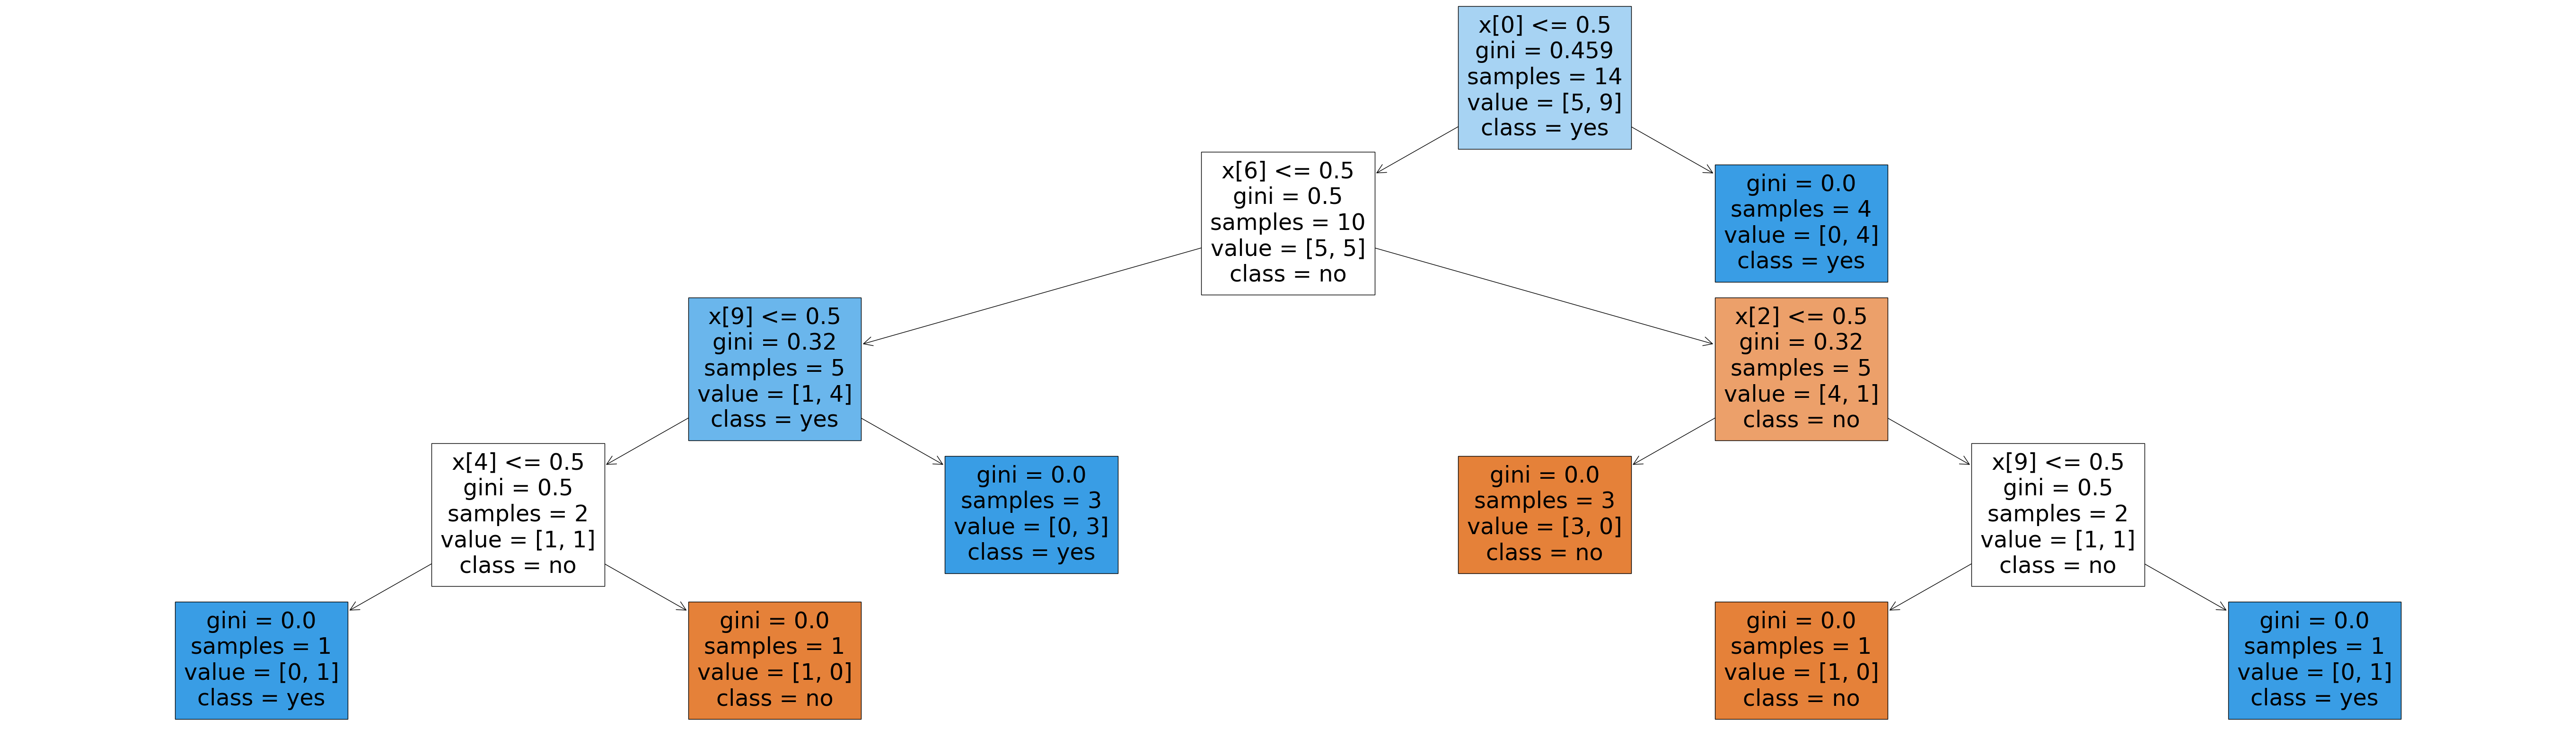

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf.fit(x_encoded, y)
plt.figure(figsize=(70, 20))
plot_tree(clf, filled=True, class_names=[str(cls) for cls in clf.classes_])
plt.show()